In [159]:
allure_etudier=2

In [160]:
import  sys

#LOCALISATION DES DONNEES
sys.path.insert(0, "C:/projets_python/diabolo")

import warnings
warnings.filterwarnings("ignore")

from math import *


#LIBRAIRIES PERSO
import etude_variable.MyLog as log
import etude_variable.jouer as jouer

import etude_variable.analyse as ana

# LIBRAIRIE PYHTON CLASSIQUES
import pandas as pd
import numpy as np
import matplotlib
import scipy
import platform

from collections import Counter

#ESTIMATEUR
import sklearn
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn import neighbors, datasets
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer

from sklearn.ensemble import GradientBoostingClassifier



from scipy.stats import uniform
from scipy.stats import randint

#TRAINING
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
import dask_searchcv as dcv
from skopt.space import Real, Integer
from sklearn.model_selection import cross_validate

#Evaluateur
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

from sklearn.feature_selection import SelectFromModel


from evolutionary_search import EvolutionaryAlgorithmSearchCV
from sklearn.utils import class_weight

#outils
from dask.diagnostics import ProgressBar
import logging
from datetime import datetime


#Metriques
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve
from sklearn import  metrics
from sklearn.metrics import  roc_auc_score
from sklearn.metrics import  classification_report

#Outils

import time


#Graphique
from matplotlib import pyplot
from matplotlib import pyplot as plt
import seaborn as sns

print('Operating system version....', platform.platform())
print("Python version is........... %s.%s.%s" % sys.version_info[:3])
print('scikit-learn version is.....', sklearn.__version__)
print('pandas version is...........', pd.__version__)
print('numpy version is............', np.__version__)
print('matplotlib version is.......', matplotlib.__version__)
print('scipy version is.......', scipy.__version__)


Operating system version.... Windows-10-10.0.17134-SP0
Python version is........... 3.6.5
scikit-learn version is..... 0.19.1
pandas version is........... 0.22.0
numpy version is............ 1.14.2
matplotlib version is....... 2.2.0
scipy version is....... 1.0.0


# LECTURE DES DONNEES

In [161]:
def plot_importance(feature_columns, model):
    importances = pd.DataFrame({'feature': feature_columns, 'importance': np.round(model.feature_importances_, 3)})
    importances = importances.sort_values('importance', ascending=False).set_index('feature')
    print("")
    print( importances)
    importances.plot.bar()
    
    
def metrique_classe(y_pred,y_true,xclass):
    from imblearn.metrics import specificity_score
    from imblearn.metrics import sensitivity_score


    from imblearn.metrics import geometric_mean_score



    # La sensibilité est le rapport où est le nombre de vrais positifs et le nombre de faux négatifs.
    # La sensibilité quantifie la capacité à éviter les faux négatifs.tp


    # estimator issu de quelques FIT




    log.traceLogInfo("Sensibilité  du re-equilibrage des données sur le TEST")
    #log.traceLogInfo("Binary ",sensitivity_score(y_true, y_pred, average='binary', pos_label=xclass))

    log.traceLogInfo("La spécificité est intuitivement la capacité du classificateur à trouver tous les échantillons positifs")

    log.traceLogInfo("Binary ")
    log.traceLogInfo(specificity_score(y_true, y_pred, labels=None, pos_label=xclass, average='binary', sample_weight=None))




    print("\nCalculer la moyenne géométrique")
    print(geometric_mean_score(y_true, y_pred,labels=None, pos_label=xclass))

    print("\n Calculer  sensitivity score")
    print("La sensibilité est le rapport où est le nombre de vrais positifs et le nombre de faux négatifs.")
    print("La sensibilité quantifie la capacité à éviter les faux négatifs.")

    print(sensitivity_score(y_true, y_pred, labels=None, pos_label=xclass,average='binary'))

    

In [162]:
def lecture_data(Fichier, xnames, xindex_col, allure=1, mode_debug=0, avec_index=True):
    if avec_index==True:
        df = pd.read_csv(Fichier,  index_col=xindex_col,     sep=';',     names=xnames,               skipinitialspace=True,              encoding='Latin-1')
    else:
        df = pd.read_csv(Fichier,   index_col=None,  sep=';',                     names=xnames,                         skipinitialspace=True,     encoding='Latin-1')

    df = df.groupby("ALLURE")
    df = df.get_group(allure)
    #print(df.info())


    return df


def lecture_data2(Fichier, xnames, xindex_col, allure=1, mode_debug=0, avec_index=True):
    if avec_index==True:
        df = pd.read_csv(Fichier,  index_col=xindex_col,     sep=';',     names=xnames,               skipinitialspace=True,              encoding='Latin-1')
    else:
        df = pd.read_csv(Fichier,   index_col=None,  sep=';',                     names=xnames,                         skipinitialspace=True,     encoding='Latin-1')

    #print(df.info())


    return df


def split_dataset(dataset, train_percentage, feature_headers,
                                  target_header,random_state=42,mode_debug=0):

    train_x, test_x, train_y, test_y = train_test_split(dataset[feature_headers], dataset[target_header],
                                                        train_size=train_percentage, test_size=None, random_state=42)


    if mode_debug==1:
        # Train and Test dataset size details
        print("--------------------------------")
        print("Train_x Shape :: ", train_x.shape)
        print("Train_y Shape :: ", train_y.shape)
        print("Test_x Shape :: ", test_x.shape)
        print("Test_y Shape :: ", test_y.shape)
        print("--------------------------------")

    return train_x, test_x, train_y, test_y

In [163]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        print(start_time)
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))
        
        
def explo_variable(dataset, svariable):

     # On calcule le quantile 0,25 qui est le quartile Q1
    mediane = np.median(dataset)
    print ("La mediane              "+svariable+"    : ", round(mediane, 2))

    maxx = np.max(dataset)
    print ("Le max              "+svariable+"    : ", round(maxx, 2))
    
    minn = np.min(dataset)
    print ("Le min              "+svariable+"    : ", round(minn, 2))
    
    
    moy = np.mean(dataset)
    print ("La moyenne               "+svariable+"   : ", round(moy, 2))

    variance = np.var(dataset)
    print ("La variance est          "+svariable+"   : ", round(variance, 2))
    
    ecartType = np.std(dataset)
    print ("Le ecart type            "+svariable+"   : ", round(ecartType, 2))
     
    print("")      
    
   # print(dataset.describe())
    
    print("")    
    
def afficheEvalSet(mybest_model,
                    set_train,
                   set_train_cible,
                   set_test,
                   set_test_cible,
                   mode_debug=0,
                   type_eval=1):

    print("\nEVAL SET ....")

    set_test_cible_predicted = mybest_model.predict(set_test)
    set_train_cible_predicted = mybest_model.predict(set_train)

    if type_eval==1:
                print("Evaluation TEST-----------------------------------------------------------------------")
                set_test_cible_probabilities = mybest_model.predict_proba(set_test)
                score = set_test_cible_probabilities[:, 1]
                auc = roc_auc_score(set_test_cible, set_test_cible_predicted)
                print("TEST roc_auc_score :  %s" % auc)
    else:
                set_train_cible_probabilities = mybest_model.predict_proba(set_train)
                auc = roc_auc_score(set_train_cible, set_train_cible_predicted)
                print("TRAINING roc_auc_score :  %s" % auc)
    
    for x, y in [(set_train, set_train_cible), (set_test, set_test_cible)]:
            yp = mybest_model.predict(x)
            cm = confusion_matrix(y, yp.ravel())
            print(cm)

    import matplotlib.pyplot as plt

    
    
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    if type_eval==1:
        ntotal = len(set_test)
        correct = set_test_cible == set_test_cible_predicted
        numCorrect = sum(correct)
        percent = round((100.0 * numCorrect) / ntotal, 3)

        log.traceLogInfo("Classification Correcte des données de test : {0:d}/{1:d}  {2:8.3f}%".format(numCorrect, ntotal, percent))

        prediction_score = 100.0 * mybest_model.score(set_test, set_test_cible)
        log.traceLogInfo('\nScore  TEST  : %8.3f  ************************' % prediction_score)
    else:
        ntotal = len(set_train)
        correct = set_train_cible== set_train_cible_predicted
        numCorrect = sum(correct)
        percent = round((100.0 * numCorrect) / ntotal, 3)

        log.traceLogInfo("\n CLASSIFICATION CORRECTE DES DONNEES DE Train  : {0:d}/{1:d}  {2:8.3f}%".format(numCorrect, ntotal, percent))

        prediction_score = 100.0 * mybest_model.score(set_train, set_train_cible)
        log.traceLogInfo('Score  TRAINING  : %8.3f  ************************' % prediction_score)
        
        
        
def courbe_de_roc(model, test_x,test_y):
    from sklearn.metrics import roc_curve, auc

    probas = model.predict_proba(test_x)
    # probas est une matrice de deux colonnes avec la proabilités d'appartenance à chaque classe

    fpr, tpr, thresholds = roc_curve(test_y, probas[:, 1])
    roc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % roc_auc)
        
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")        


In [164]:
def evaluation_2(model, train_x, train_y, test_x, test_y):    
    from sklearn.feature_selection import RFE
    rfc=model
    # create the RFE model and select 4 attributes
    rfe_model = RFE(rfc, 9, step=1)
    rfe_model = rfe_model.fit(train_x, train_y)
    # summarize the selection of the attributes
    print(rfe_model.support_)
    print(rfe_model.ranking_)

    # evaluate the model on testing set
    pred_y = rfe_model.predict(test_x)
    predictions = [round(value) for value in pred_y]
    accuracy = accuracy_score(test_y, predictions)
    print("Test Accuracy: %.2f%%" % (accuracy*100.0))
    print(train_x.mean()   )

# fit speciaux

In [165]:
def my_fit2(estimateur, train_x, train_y):
    kfold = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
    
    results = cross_val_score(estimateur, train_x, train_y, cv=kfold)
    print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    
    y_pred = model.predict(test_x)
    predictions = [round(value) for value in y_pred]
    return model,y_pred,predictions


def fit_special(estimateur,    test_x,test_y, train_x, train_y):
    # Use SelectFromModel
    thresholds = np.sort(estimateur.best_estimator_.named_steps["clf"].feature_importances_)

    for thresh in thresholds:
        # select features using threshold
        selection = SelectFromModel(estimateur, threshold=thresh, prefit=True)
        select_X_train = selection.transform(train_x)

        # train model
        selection_model = estimateur
        selection_model.fit(select_X_train, train_y)

        # eval model
        select_X_test = selection.transform(test_x)
        y_pred = selection_model.predict(select_X_test)
        predictions = [round(value) for value in y_pred]
        accuracy = accuracy_score(test_y, predictions)
        print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy * 100.0))
        print(confusion_matrix(test_y, predictions))
        print(classification_report(test_y, predictions))

    y_pred = estimateur.predict(test_x)
    predictions = [round(value) for value in y_pred]
    return estimateur,y_pred,predictions


In [166]:

def my_drop(df, col):
    if col in df:
        df.drop([col], axis=1, inplace=True)
    return df




def encodage(df_x):
    
    from sklearn import preprocessing
    #le = preprocessing.LabelEncoder()
    #df_gagnant[['HIPPO']] = le.fit_transform(df_gagnant[['HIPPO']])
    #df_gagnant[['PAR_PROPRIO']] = le.fit_transform(df_gagnant[['PAR_PROPRIO']])
    ##f_gagnant[['NOM_JOC']] = le.fit_transform(df_gagnant[['NOM_JOC']])
    #df_gagnant[['NOM_ENTR']] = le.fit_transform(df_gagnant[['NOM_ENTR']])
    #df_gagnant[['CHEVAL']] = le.fit_transform(df_gagnant[['CHEVAL']])
    #df_gagnant[['PAR_NUM']] = le.fit_transform(df_gagnant[['PAR_NUM']])
   # df_gagnant[['MUSIC_CHEVAL']] = le.fit_transform(df_gagnant[['MUSIC_CHEVAL']])



    from sklearn.preprocessing import RobustScaler
    from sklearn.preprocessing import quantile_transform





    #scaler = RobustScaler()
   # scaler = RobustScaler( with_scaling=False, quantile_range=(30.0, 70.0), copy=False)

    critere_scale = [
      
              
              'PAR_AGE',
              'PAR_CARRIERE',
              'PAR_CARRIERE_Q',
              'PAR_CLASSE_AGE',
              'PAR_COTEDER',
              'PAR_ENT_ECART_GAGNANT',
              'PAR_ENT_RAPPORT_GAGNANT_M',
              'PAR_ENT_REU_PLACE',
              'PAR_ENT_REUSSITE_GAGNE',
              'PAR_ENT_VICTOIRE',
              'PAR_GAIN',
              'pAR_JOC_ECART_GAGNANT',
              'PAR_JOC_ECART_PLACE',
              'PAR_JOC_NB_COURSE',
              'PAR_JOC_PLACE_3P',
              'pAR_JOC_RAPPORT_GAGNANT_M',
              'PAR_JOC_REU_PLACE',
              'pAR_JOC_REUSSITE_GAGNE',
              'pAR_JOC_VICTOIRE',
              'PAR_NP',
              'PAR_NUM',
              'PAR_PLACE',
              'PAR_PLACE_Q',
              'PAR_REUSSITE_3P',
              'PAR_REUSSITE_GAGNE',
              'PAR_REUSSITE_QUINTE',
              'PAR_RUESSITE_PLACE',

              

          #    'Point',
              

              'POIDS',
              
              
              'PAR_ENT_ECART_PLACE',
              'PAR_VICTOIRE',
              'PAR_VICTOIRE_Q',
          'PAR_ENT_NB_COURSE',
                      ]
    
    

     

    #df_gagnant[critere_scale] = quantile_transform(df_gagnant[critere_scale], n_quantiles=4)

    #df_gagnant[critere_scale] = qt.fit_transform(df_gagnant[critere_scale])
    df_x[critere_scale] = quantile_transform(df_x[critere_scale], n_quantiles=5000, random_state=0,subsample=300000)

   # df_x[critere_scale] = scaler.fit_transform(df_x[critere_scale])

    return df_x,critere_scale


In [167]:
def suppression_colonne(df2,allure):

    # df=my_drop(df, "PAR_AGE")
    print('Suppression colonnne ', allure)

    if  allure==0:

        df2.drop(["FIN_ligne"], axis=1, inplace=True)

        df2.drop(["PAR_NP"], axis=1, inplace=True)
        df2.drop(["cendre"], axis=1, inplace=True)
        df2.drop(["MUSIC_CHEVAL"], axis=1, inplace=True)
        df2.drop(["MUSIC_ENT"], axis=1, inplace=True)
        df2.drop(["MUSIC_JOC"], axis=1, inplace=True)
        df2.drop(["grande_piste"], axis=1, inplace=True)
        df2.drop(["PAR_VALEUR"], axis=1, inplace=True)
        df2.drop(["autostart"], axis=1, inplace=True)
        df2.drop(["CO_DISTANCE"], axis=1, inplace=True)
        
        #df2.drop(["Point"], axis=1, inplace=True)
        df2.drop(["CHEVAL"], axis=1, inplace=True)
        df2.drop(["HIPPO"], axis=1, inplace=True)
        df2.drop(["NOM_JOC"], axis=1, inplace=True)
        df2.drop(["NOM_ENTR"], axis=1, inplace=True)
        df2.drop(["CO_PRIX"], axis=1, inplace=True)
        df2.drop(["Nb_partant"], axis=1, inplace=True)
        df2.drop(["PAR_PROPRIO"], axis=1, inplace=True)
        
        

        
        df2 = my_drop(df2, 'PAR_COTEDER')            
        


    if allure == 1:
        df2 = my_drop(df2, "POIDS")
        df2 = my_drop(df2, "CORDE")
   
    if allure==2:
        
        df2 = my_drop(df2, "MY_auto_start")
      #  df2 = my_drop(df2, "PAR_VICTOIRE_Q")
        
        
        

    if allure == 3:
        df2 = my_drop(df2, "POIDS")
        df2 = my_drop(df2, "CORDE")
        df2 = my_drop(df2, "MY_auto_start")



    if allure == 4:
        df2 = my_drop(df2, "CORDE")
        df2 = my_drop(df2, "MY_auto_start")


    if allure == 5:
        df2 = my_drop(df2, "CORDE")
        df2 = my_drop(df2, "MY_auto_start")


    return df2

# selection

In [168]:
  # Lecture des données sans index
xnames = ['ALLURE', 'CO_DISTANCE',
              'CO_PRIX', 'HIPPO',
              'IDCOURSE', 'IDPARTCIPANT',
              'PAR_AGE', 'PAR_ARRIVE',
              'PAR_CARRIERE',
              'PAR_CARRIERE_Q',
              'PAR_CLASSE_AGE',
              'PAR_COTEDER',
              'PAR_ENT_ECART_GAGNANT',
              'PAR_ENT_RAPPORT_GAGNANT_M',
              'PAR_ENT_REU_PLACE',
              'PAR_ENT_REUSSITE_GAGNE',
              'PAR_ENT_VICTOIRE',
              'PAR_GAIN',
              'pAR_JOC_ECART_GAGNANT',
              'PAR_JOC_ECART_PLACE',
              'PAR_JOC_NB_COURSE',
              'PAR_JOC_PLACE_3P',
              'pAR_JOC_RAPPORT_GAGNANT_M',
              'PAR_JOC_REU_PLACE',
              'pAR_JOC_REUSSITE_GAGNE',
              'pAR_JOC_VICTOIRE',
              'PAR_NP',
              'PAR_NUM',
              'PAR_PLACE',
              'PAR_PLACE_Q',
              'PAR_REUSSITE_3P',
              'PAR_REUSSITE_GAGNE',
              'PAR_REUSSITE_QUINTE',
              'PAR_RUESSITE_PLACE',
              'autostart',
              'cendre',
              'grande_piste',
              'Point',
              'Nb_partant',
              'PAR_PROPRIO',
              'NOM_JOC',
              'NOM_ENTR',
              'POIDS',
              'CORDE', 'CHEVAL',
              'MUSIC_CHEVAL',
              'MUSIC_ENT',
              'MUSIC_JOC',
              'PAR_VALEUR',
              'PAR_ENT_ECART_PLACE',
              'PAR_VICTOIRE',
              'PAR_VICTOIRE_Q',
          'PAR_ENT_NB_COURSE',
              'FIN_ligne']

#--------------------------------------------------------------------------
  # Lecture des données sans index
xnames2 = ['ALLURE', 'CO_DISTANCE',
              'CO_PRIX', 'HIPPO',
              'IDCOURSE', 'IDPARTCIPANT',
              'PAR_AGE', 'PAR_ARRIVE',
              'PAR_CARRIERE',
              'PAR_CARRIERE_Q',
              'PAR_CLASSE_AGE',
              'PAR_COTEDER',
              'PAR_ENT_ECART_GAGNANT',
              'PAR_ENT_RAPPORT_GAGNANT_M',
              'PAR_ENT_REU_PLACE',
              'PAR_ENT_REUSSITE_GAGNE',
              'PAR_ENT_VICTOIRE',
              'PAR_GAIN',
              'pAR_JOC_ECART_GAGNANT',
              'PAR_JOC_ECART_PLACE',
              'PAR_JOC_NB_COURSE',
              'PAR_JOC_PLACE_3P',
              'pAR_JOC_RAPPORT_GAGNANT_M',
              'PAR_JOC_REU_PLACE',
              'pAR_JOC_REUSSITE_GAGNE',
              'pAR_JOC_VICTOIRE',
              'PAR_NP',
              'PAR_NUM',
              'PAR_PLACE',
              'PAR_PLACE_Q',
              'PAR_REUSSITE_3P',
              'PAR_REUSSITE_GAGNE',
              'PAR_REUSSITE_QUINTE',
              'PAR_RUESSITE_PLACE',
              'autostart',
              'cendre',
              'grande_piste',
              'Point',
              'Nb_partant',
              'PAR_PROPRIO',
              'NOM_JOC',
              'NOM_ENTR',
              'POIDS',
              'CORDE', 'CHEVAL',
              'MUSIC_CHEVAL',
              'MUSIC_ENT',
              'MUSIC_JOC',
              'PAR_VALEUR',
              'PAR_ENT_ECART_PLACE',
              'PAR_VICTOIRE',
              'PAR_VICTOIRE_Q',
          'PAR_ENT_NB_COURSE',
             'FIN_ligne',
             'SELECTION2',
              'p2018']

# Creating bins for the win column
def assign_selection(W):
    if W <=4:
        return 1
    else:
        return 0
    
    # Creating bins for the win column
def assign_selection2(W):
    if W == 1.0:
        return 1
    if W == 0.0:
        return 0



index_col = ['IDPARTCIPANT', 'IDCOURSE']
start_time=timer()
df = lecture_data('d:\data_diabolo.csv', xnames, xindex_col=index_col, allure=allure_etudier, avec_index=False)
df = df.groupby("ALLURE")
df = df.get_group(allure_etudier)
timer(start_time)
    

2018-07-03 21:09:19.745198

 Time taken: 0 hours 0 minutes and 2.51 seconds.


In [169]:
df.describe()

,ALLURE,CO_DISTANCE,CO_PRIX,HIPPO,IDCOURSE,IDPARTCIPANT,PAR_AGE,PAR_ARRIVE,PAR_CARRIERE,PAR_CARRIERE_Q,...,NOM_JOC,NOM_ENTR,POIDS,CORDE,CHEVAL,PAR_VALEUR,PAR_ENT_ECART_PLACE,PAR_VICTOIRE,PAR_VICTOIRE_Q,PAR_ENT_NB_COURSE
count,163850.0,163850.0,1.638500e+05,163850.000000,163850.000000,163850.000000,163850.000000,163850.000000,163850.000000,163850.000000,...,163850.000000,163850.000000,163850.000000,163850.000000,163850.000000,163850.000000,163850.000000,163850.000000,163850.000000,163850.000000
mean,2.0,0.0,2.683321e+05,68.872920,32066.555581,396071.395551,4.546921,56.167910,23.342338,1.080262,...,1338.001715,1687.043045,57.016283,6.551224,29777.580464,13.733647,2.353714,2.439231,0.065706,162.676057
std,0.0,0.0,1.840759e+07,58.710773,14441.799537,179479.007966,1.839016,47.730222,23.899785,3.372155,...,1752.186353,1847.480248,2.866205,3.976687,22268.785333,15.726439,3.471807,2.938038,0.338378,188.689056
min,2.0,0.0,0.000000e+00,2.000000,1622.000000,19919.000000,2.000000,0.000000,0.000000,0.000000,...,13.000000,13.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.0,0.0,8.500000e+03,26.000000,21484.000000,263592.250000,3.000000,3.000000,6.000000,0.000000,...,176.000000,327.000000,56.000000,3.000000,10898.000000,0.000000,0.000000,0.000000,0.000000,24.000000
50%,2.0,0.0,1.600000e+04,56.000000,32209.000000,398190.500000,4.000000,99.000000,15.000000,0.000000,...,620.000000,992.000000,57.000000,6.000000,25308.000000,0.000000,1.000000,1.000000,0.000000,92.000000
75%,2.0,0.0,2.475000e+04,86.000000,42922.000000,531664.750000,6.000000,99.000000,34.000000,0.000000,...,1876.000000,2383.000000,58.000000,9.000000,44937.000000,28.000000,3.000000,4.000000,0.000000,246.000000
max,2.0,0.0,1.630545e+09,286.000000,56536.000000,699336.000000,16.000000,99.000000,194.000000,64.000000,...,8866.000000,9713.000000,79.000000,24.000000,82140.000000,74.000000,54.000000,24.000000,11.000000,931.000000


In [170]:
def MY_REUSSITE_CHEVAL(par_reussite_gagne,par_reussite_place):
        if par_reussite_place==0.0:
            return 0
        return par_reussite_gagne/par_reussite_place


def Gest_ecart_joc(ecart,nb_course, reussite):
    if nb_course > 100:
        if reussite >0.20:
            if ecart>6:
                 return 1
                
    return 0          

                
def Gest_ecart_ENT(ecart,nb_course, reussite):
    if nb_course > 200:
        if reussite >0.30:
            if ecart>10:
                 return 1
                
                
                
    return 0     



def Gest_autostart(auto_s,num):
    if auto_s >= 1:
        if num<=9:
              return 1
                                        
    return 0     

def relation_1(A,B):
    if B==0:
        return 0
                                           
    return A/B



def CHEVAL_QUINTE(nb_q):
    if nb_q > 0:
                 return 1
    
    
    return 0

In [227]:
def transformation(df2,allure_etudier):
    #Filtre des données¶
    print('\n\n----------- TRANSFORMATION --------- AJOUT DE COLONNE------------\n')
    start_time=timer()
    df2=df2[df2.Point>0]

    df2 = df2[df2.PAR_COTEDER > 0]
   # df2 = df2[df2.CO_PRIX > 0]
    df2 = df2[df2.PAR_GAIN >= 0]
    df2 = df2[df2.PAR_GAIN < 1000000]



    #df2 = ld.my_drop(df2, 'PAR_COTEDER')
    df2 = df2[df2.PAR_ARRIVE > 0]  # On garde la ligne qui possede information arrivée

    df2 = df2.groupby("ALLURE")
    df2 = df2.get_group(allure_etudier)
    df2 = my_drop(df2, 'ALLURE')

    if allure_etudier == 2 or allure_etudier == 4 or allure_etudier == 5:
        df2 = df2[df2.POIDS > 20]
        df2 = df2[df2.POIDS < 80]
    #  on a lu les données avant l 'ajout de la colonne SELECTIOB
    df2['SELECTION2'] = df2['PAR_ARRIVE'].apply(assign_selection)
    df2 = my_drop(df2, 'PAR_ARRIVE')

        
    

    #df2['CHEVAL_QUINTE'] = df2.apply(lambda x: CHEVAL_QUINTE(x['PAR_CARRIERE_Q']), axis=1)    
    timer(start_time)
    return df2
   
    
def transformationPoint(df2,allure_etudier):
    #Filtre des données¶
    print('\n\n----------- TRANSFORMATION --------- AJOUT DE COLONNE------------\n')
    start_time=timer()
    


    #df2 = ld.my_drop(df2, 'PAR_COTEDER')
    #df2 = df2[df2.PAR_ARRIVE > 0]  # On garde la ligne qui possede information arrivée

    #  on a lu les données avant l 'ajout de la colonne SELECTIOB
   # df2['SELECTION2'] = df2['PAR_ARRIVE'].apply(assign_selection)
    #df2 = my_drop(df2, 'PAR_ARRIVE')

        
    

    #df2['CHEVAL_QUINTE'] = df2.apply(lambda x: CHEVAL_QUINTE(x['PAR_CARRIERE_Q']), axis=1)    
    timer(start_time)
    return df2


In [228]:
def transformation_courses(df2,allure_etudier):
    #Filtre des données¶
    print('\n\n----------- TRANSFORMATION --------- AJOUT DE COLONNE------------\n')
    start_time=timer()
    #df2=df2[df2.Point>0]

    #df2 = df2[df2.PAR_COTEDER > 0]
    #df2 = df2[df2.CO_PRIX > 0]
    #df2 = df2[df2.PAR_GAIN >= 0]
    #df2 = df2[df2.PAR_GAIN < 1000000]



    #df2 = ld.my_drop(df2, 'PAR_COTEDER')
    #df2 = df2[df2.PAR_ARRIVE > 0]  # On garde la ligne qui possede information arrivée

    df2 = df2.groupby("ALLURE")
    df2 = df2.get_group(allure_etudier)
    df2 = my_drop(df2, 'ALLURE')

    #if allure_etudier == 2 or allure_etudier == 4 or allure_etudier == 5:
     #   df2 = df2[df2.POIDS > 20]
      #  df2 = df2[df2.POIDS < 80]
    #  on a lu les données avant l 'ajout de la colonne SELECTIOB
    #df2['SELECTION2'] = df2['PAR_ARRIVE'].apply(assign_selection)
    #df2 = my_drop(df2, 'PAR_ARRIVE')


        
    
    

    #df2['CHEVAL_QUINTE'] = df2.apply(lambda x: CHEVAL_QUINTE(x['PAR_CARRIERE_Q']), axis=1)    
    timer(start_time)
    return df2
   

In [229]:

def somme_note(df,num_course,critere):
   # valeur_critere=df.loc[df['IDCOURSE']==num_course,cri]  # selection critere     
    df.loc[df['IDCOURSE']==num_course,'p2018']  = df.loc[df['IDCOURSE']==num_course,'p2018'] +df.loc[df['IDCOURSE']==num_course,critere]
    #print(valeur_critere['p2018'])
    
    return df
    


def calcul_note(df, num_course, cri):
    valeur_critere=df.loc[df['IDCOURSE']==num_course,cri]  # selection critere    
    maxx=valeur_critere.max() #MAXI
    
    if ((maxx[0])>0):
        # selection ligne d'une course et avec un critere cri
        df.loc[df['IDCOURSE']==num_course,cri]= (( df.loc[df['IDCOURSE']==num_course,cri])/maxx[0]) *20

    else:
        df.loc[df['IDCOURSE']==num_course,cri]=0
    

        
    df=somme_note(df,num_course,cri[0])
    #print( df.loc[df['IDCOURSE']==num_course,'p2018'])
    return  df

#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




#-------------------------------------------------------------------------------------------------------------------------------------------------------
def calcul_les_notes(df):
    i=0
    start_time=timer()
    df['p2018']=0
    
    for n  in df.groupby(['IDCOURSE'],axis=0):
        nc=n[0]
        if math.fmod(i,500)==0 or i<20:
            print("    print(N° ",i,timer(start_time))
            #df= calcul_note(df, nc, ['PAR_CARRIERE'] )
        df= calcul_note(df, nc, ['PAR_ENT_ECART_GAGNANT'] )
        df= calcul_note(df, nc, ['PAR_ENT_RAPPORT_GAGNANT_M'] )
        df= calcul_note(df, nc, ['PAR_ENT_REU_PLACE'] )
        df= calcul_note(df, nc, ['PAR_ENT_REUSSITE_GAGNE'] )
        df= calcul_note(df, nc, ['PAR_ENT_VICTOIRE'] ) 
        df= calcul_note(df, nc, ['PAR_ENT_NB_COURSE'] )   
    
        df= calcul_note(df, nc, ['pAR_JOC_ECART_GAGNANT'] )
        df= calcul_note(df, nc, ['pAR_JOC_RAPPORT_GAGNANT_M'] )
        df= calcul_note(df, nc, ['PAR_JOC_REU_PLACE'] )
        
        df= calcul_note(df, nc, ['pAR_JOC_REUSSITE_GAGNE'] )
        df= calcul_note(df, nc, ['pAR_JOC_VICTOIRE'] )    
        df= calcul_note(df, nc, ['PAR_JOC_ECART_PLACE'] )
        df= calcul_note(df, nc, ['PAR_JOC_NB_COURSE'] )    
        df= calcul_note(df, nc, ['PAR_JOC_PLACE_3P'] )    
    
        df= calcul_note(df, nc, ['PAR_REUSSITE_GAGNE'] )
        df= calcul_note(df, nc, ['PAR_RUESSITE_PLACE'] )
        df= calcul_note(df, nc, ['PAR_REUSSITE_3P'] )    
        df= calcul_note(df, nc, ['PAR_CARRIERE'] )
        df= calcul_note(df, nc, ['PAR_CARRIERE_Q'] )
        df= calcul_note(df, nc, ['PAR_GAIN'] )
        df= calcul_note(df, nc, ['PAR_PLACE'] )
        df= calcul_note(df, nc, ['PAR_PLACE_Q'] )
        df= calcul_note(df, nc, ['PAR_CLASSE_AGE'] )
        df= calcul_note(df, nc, ['PAR_VICTOIRE'] )
        df= calcul_note(df, nc, ['PAR_REUSSITE_QUINTE'] )
      
        i=i+1
        if (i==10):
            break;
            

    return df

In [230]:
def nettoyer_Nan(df):
    df[['PAR_ENT_ECART_GAGNANT']] = df[['PAR_ENT_ECART_GAGNANT']].fillna( df[['PAR_ENT_ECART_GAGNANT']].mean())
    df[['PAR_ENT_RAPPORT_GAGNANT_M']] = df[['PAR_ENT_RAPPORT_GAGNANT_M']].fillna( df[['PAR_ENT_RAPPORT_GAGNANT_M']].mean())
    df[['PAR_ENT_REU_PLACE']] = df[['PAR_ENT_REU_PLACE']].fillna( df[['PAR_ENT_REU_PLACE']].mean())
    df[['PAR_ENT_REUSSITE_GAGNE']] = df[['PAR_ENT_REUSSITE_GAGNE']].fillna( df[['PAR_ENT_REUSSITE_GAGNE']].mean())
    df[['PAR_ENT_VICTOIRE']] = df[['PAR_ENT_VICTOIRE']].fillna( df[['PAR_ENT_VICTOIRE']].mean())
    df[['PAR_ENT_NB_COURSE']] = df[['PAR_ENT_NB_COURSE']].fillna( df[['PAR_ENT_NB_COURSE']].mean())
    
    df[['pAR_JOC_ECART_GAGNANT']] = df[['pAR_JOC_ECART_GAGNANT']].fillna( df[['pAR_JOC_ECART_GAGNANT']].mean())
    df[['pAR_JOC_RAPPORT_GAGNANT_M']] = df[['pAR_JOC_RAPPORT_GAGNANT_M']].fillna( df[['pAR_JOC_RAPPORT_GAGNANT_M']].mean())
    df[['PAR_JOC_REU_PLACE']] = df[['PAR_JOC_REU_PLACE']].fillna( df[['PAR_JOC_REU_PLACE']].mean())
    df[['pAR_JOC_REUSSITE_GAGNE']] = df[['pAR_JOC_REUSSITE_GAGNE']].fillna( df[['pAR_JOC_REUSSITE_GAGNE']].mean())
    df[['pAR_JOC_VICTOIRE']] = df[['pAR_JOC_VICTOIRE']].fillna( df[['pAR_JOC_VICTOIRE']].mean())
    df[['PAR_JOC_ECART_PLACE']] = df[['PAR_JOC_ECART_PLACE']].fillna( df[['PAR_JOC_ECART_PLACE']].mean())
    df[['PAR_JOC_NB_COURSE']] = df[['PAR_JOC_NB_COURSE']].fillna( df[['PAR_JOC_NB_COURSE']].mean())
    df[['PAR_JOC_PLACE_3P']] = df[['PAR_JOC_PLACE_3P']].fillna( df[['PAR_JOC_PLACE_3P']].mean())
    df['PAR_RUESSITE_PLACE'] = df['PAR_RUESSITE_PLACE'].fillna( df['PAR_RUESSITE_PLACE'].mean())
    df[['PAR_REUSSITE_GAGNE']] = df[['PAR_REUSSITE_GAGNE']].fillna( 0)
    df[['PAR_REUSSITE_3P']] = df[['PAR_REUSSITE_3P']].fillna( df[['PAR_REUSSITE_3P']].mean())
    df[['PAR_CARRIERE']] = df[['PAR_CARRIERE']].fillna( df[['PAR_CARRIERE']].mean())
    df[['PAR_CARRIERE_Q']] = df[['PAR_CARRIERE_Q']].fillna( df[['PAR_CARRIERE_Q']].mean())
    df[['PAR_GAIN']] = df[['PAR_GAIN']].fillna( df[['PAR_GAIN']].mean())    
    df[['PAR_PLACE']] = df[['PAR_PLACE']].fillna( df[['PAR_PLACE']].mean())
    df[['PAR_PLACE_Q']] = df[['PAR_PLACE_Q']].fillna( df[['PAR_PLACE_Q']].mean())
    df[['PAR_CLASSE_AGE']] = df[['PAR_CLASSE_AGE']].fillna( df[['PAR_CLASSE_AGE']].mean())
    df[['PAR_POINT']] = df[['PAR_POINT']].fillna( df[['PAR_POINT']].mean())
        
    return df


import math
def relation_1(a,b):
    if b==0:
        return 0
    else:
        return (a/b)*20
    
#---------------------------------------------------------------------------------------------------------------------

    






# Filtre des données  :  TRI DIVERS 

In [231]:

df2=transformation(df,allure_etudier)

df2=calcul_les_notes(df2)
    
    





----------- TRANSFORMATION --------- AJOUT DE COLONNE------------

2018-07-03 22:17:23.491269

 Time taken: 0 hours 0 minutes and 0.44 seconds.
2018-07-03 22:17:23.936111

 Time taken: 0 hours 0 minutes and 0.07 seconds.
    print(N°  0 None

 Time taken: 0 hours 0 minutes and 0.77 seconds.
    print(N°  1 None

 Time taken: 0 hours 0 minutes and 1.04 seconds.
    print(N°  2 None

 Time taken: 0 hours 0 minutes and 1.29 seconds.
    print(N°  3 None

 Time taken: 0 hours 0 minutes and 1.58 seconds.
    print(N°  4 None

 Time taken: 0 hours 0 minutes and 1.85 seconds.
    print(N°  5 None

 Time taken: 0 hours 0 minutes and 2.16 seconds.
    print(N°  6 None

 Time taken: 0 hours 0 minutes and 2.45 seconds.
    print(N°  7 None

 Time taken: 0 hours 0 minutes and 2.8 seconds.
    print(N°  8 None

 Time taken: 0 hours 0 minutes and 3.07 seconds.
    print(N°  9 None


In [224]:
if allure_etudier==1:
    df2.to_csv('d:\diabolo_1_note.csv')
if allure_etudier==2:
    df2.to_csv('d:\diabolo_2_note.csv')    
    

In [246]:
df2= lecture_data2('d:\diabolo_1_note.csv', xnames2, xindex_col=index_col, allure=allure_etudier, avec_index=False)


NameError: name 'df3' is not defined

In [233]:
df2=transformationPoint(df2,allure_etudier)
#df2, critere_scale = encodage(df2)
df2.head(5)



----------- TRANSFORMATION --------- AJOUT DE COLONNE------------

2018-07-03 22:17:34.405145

 Time taken: 0 hours 0 minutes and 0.0 seconds.


,CO_DISTANCE,CO_PRIX,HIPPO,IDCOURSE,IDPARTCIPANT,PAR_AGE,PAR_CARRIERE,PAR_CARRIERE_Q,PAR_CLASSE_AGE,PAR_COTEDER,...,MUSIC_ENT,MUSIC_JOC,PAR_VALEUR,PAR_ENT_ECART_PLACE,PAR_VICTOIRE,PAR_VICTOIRE_Q,PAR_ENT_NB_COURSE,FIN_ligne,SELECTION2,p2018
102,0,23151,2,1622,19930,8,20.000000,0.0,0,23,...,1P7P0P0P,6P4P0P7P,0,0,20.0,0,6.000000,FINFIN,0,147.302378
103,0,23151,2,1622,19929,9,2.727273,0.0,0,6,...,7P7PTP6P,5P2P7P3P,0,3,0.0,0,2.857143,FINFIN,0,68.964835
104,0,23151,2,1622,19928,5,2.727273,0.0,0,56,...,3P5P7P7P,6P7P7P0P,0,0,0.0,0,4.571429,FINFIN,0,26.481786
105,0,23151,2,1622,19927,5,1.818182,0.0,0,5,...,2P0P3P7P,4P2P0P7P,0,0,10.0,0,8.857143,FINFIN,1,172.740974
106,0,23151,2,1622,19926,6,5.454545,0.0,0,5,...,2P4P7P4P,7P1P7P2P,0,0,0.0,0,8.857143,FINFIN,1,185.692143


In [234]:
df2 = suppression_colonne(df2=df2,allure=0)
df2 = suppression_colonne(df2=df2,allure=allure_etudier)


Suppression colonnne  0
Suppression colonnne  2


In [235]:
df2.head(5)

,IDCOURSE,IDPARTCIPANT,PAR_AGE,PAR_CARRIERE,PAR_CARRIERE_Q,PAR_CLASSE_AGE,PAR_ENT_ECART_GAGNANT,PAR_ENT_RAPPORT_GAGNANT_M,PAR_ENT_REU_PLACE,PAR_ENT_REUSSITE_GAGNE,...,PAR_RUESSITE_PLACE,Point,POIDS,CORDE,PAR_ENT_ECART_PLACE,PAR_VICTOIRE,PAR_VICTOIRE_Q,PAR_ENT_NB_COURSE,SELECTION2,p2018
102,1622,19930,8,20.000000,0.0,0,0.000000,7.632432,11.875,17.50,...,7.575767,115,50,10,0,20.0,0,6.000000,0,147.302378
103,1622,19929,9,2.727273,0.0,0,0.000000,0.000000,12.500,0.00,...,0.000000,62,52,3,3,0.0,0,2.857143,0,68.964835
104,1622,19928,5,2.727273,0.0,0,0.000000,0.000000,3.750,0.00,...,0.000000,19,54,7,0,0.0,0,4.571429,0,26.481786
105,1622,19927,5,1.818182,0.0,0,14.285714,13.686486,20.000,11.25,...,0.000000,149,55,9,0,10.0,0,8.857143,1,172.740974
106,1622,19926,6,5.454545,0.0,0,5.714286,7.221622,20.000,20.00,...,16.666667,171,56,2,0,0.0,0,8.857143,1,185.692143


# Definition de la cible

In [240]:
Lib_features_df = df2.columns
xdata = df2.values
df_gagnant = pd.DataFrame(data=xdata, columns=Lib_features_df)

df_gagnant['SELECTION'] = df_gagnant['SELECTION2'].apply(assign_selection2)
df_gagnant.drop(["SELECTION2"], axis=1, inplace=True)
df_gagnant = df_gagnant.set_index(index_col)

df_gagnant_len = len(df_gagnant.columns) - 1
Lib_features = df_gagnant.columns[:df_gagnant_len]

feature_columns = Lib_features  ##<<<<<<<<<<<<<<<<
response_column = ['SELECTION']  ##<<<<<<<<<<<<<<<<
log.traceLogdebug("Features                   : %s " % Lib_features, " <<<<************")

print("(1) Shape df_gagnant  ", df_gagnant.shape,"\n")
print("(2) FEATURES ",Lib_features)
print("(3) response column ",response_column)
# df_gagnant, feature_columns, response_column, ratio SONT DEFINI


(1) Shape df_gagnant   (139555, 34) 

(2) FEATURES  Index(['PAR_AGE', 'PAR_CARRIERE', 'PAR_CARRIERE_Q', 'PAR_CLASSE_AGE',
       'PAR_ENT_ECART_GAGNANT', 'PAR_ENT_RAPPORT_GAGNANT_M',
       'PAR_ENT_REU_PLACE', 'PAR_ENT_REUSSITE_GAGNE', 'PAR_ENT_VICTOIRE',
       'PAR_GAIN', 'pAR_JOC_ECART_GAGNANT', 'PAR_JOC_ECART_PLACE',
       'PAR_JOC_NB_COURSE', 'PAR_JOC_PLACE_3P', 'pAR_JOC_RAPPORT_GAGNANT_M',
       'PAR_JOC_REU_PLACE', 'pAR_JOC_REUSSITE_GAGNE', 'pAR_JOC_VICTOIRE',
       'PAR_NUM', 'PAR_PLACE', 'PAR_PLACE_Q', 'PAR_REUSSITE_3P',
       'PAR_REUSSITE_GAGNE', 'PAR_REUSSITE_QUINTE', 'PAR_RUESSITE_PLACE',
       'Point', 'POIDS', 'CORDE', 'PAR_ENT_ECART_PLACE', 'PAR_VICTOIRE',
       'PAR_VICTOIRE_Q', 'PAR_ENT_NB_COURSE', 'p2018'],
      dtype='object')
(3) response column  ['SELECTION']


In [242]:
df_gagnant.head(5)

,,PAR_AGE,PAR_CARRIERE,PAR_CARRIERE_Q,PAR_CLASSE_AGE,PAR_ENT_ECART_GAGNANT,PAR_ENT_RAPPORT_GAGNANT_M,PAR_ENT_REU_PLACE,PAR_ENT_REUSSITE_GAGNE,PAR_ENT_VICTOIRE,PAR_GAIN,...,PAR_RUESSITE_PLACE,Point,POIDS,CORDE,PAR_ENT_ECART_PLACE,PAR_VICTOIRE,PAR_VICTOIRE_Q,PAR_ENT_NB_COURSE,p2018,SELECTION
IDPARTCIPANT,IDCOURSE,,,,,,,,,,,,,,,,,,,,,
19930.0,1622.0,8.0,20.000000,0.0,0.0,0.000000,7.632432,11.875,17.50,12.0,0.0,...,7.575767,115.0,50.0,10.0,0.0,20.0,0.0,6.000000,147.302378,0
19929.0,1622.0,9.0,2.727273,0.0,0.0,0.000000,0.000000,12.500,0.00,0.0,0.0,...,0.000000,62.0,52.0,3.0,3.0,0.0,0.0,2.857143,68.964835,0
19928.0,1622.0,5.0,2.727273,0.0,0.0,0.000000,0.000000,3.750,0.00,0.0,0.0,...,0.000000,19.0,54.0,7.0,0.0,0.0,0.0,4.571429,26.481786,0
19927.0,1622.0,5.0,1.818182,0.0,0.0,14.285714,13.686486,20.000,11.25,12.0,0.0,...,0.000000,149.0,55.0,9.0,0.0,10.0,0.0,8.857143,172.740974,1
19926.0,1622.0,6.0,5.454545,0.0,0.0,5.714286,7.221622,20.000,20.00,20.0,0.0,...,16.666667,171.0,56.0,2.0,0.0,0.0,0.0,8.857143,185.692143,1


# Suppression de colonnes

In [243]:
#df_gagnant_len = len(df_gagnant.columns) - 1
#Lib_features = df_gagnant.columns[:df_gagnant_len]
feature_columns = Lib_features  ##<<<<<<<<<<<<<<<<
#response_column = ['SELECTION']  ##<<<<<<<<<<<<<<<<
log.traceLogdebug("Features                   : %s " % Lib_features, " <<<<************")

print("(1) Shape df_gagnant  ", df_gagnant.shape,"\n")
print("(2) FEATURES\n ",Lib_features,"\n")
print("(3) response column ",response_column,"\n")
df_gagnant.info()
    

(1) Shape df_gagnant   (139555, 34) 

(2) FEATURES
  Index(['PAR_AGE', 'PAR_CARRIERE', 'PAR_CARRIERE_Q', 'PAR_CLASSE_AGE',
       'PAR_ENT_ECART_GAGNANT', 'PAR_ENT_RAPPORT_GAGNANT_M',
       'PAR_ENT_REU_PLACE', 'PAR_ENT_REUSSITE_GAGNE', 'PAR_ENT_VICTOIRE',
       'PAR_GAIN', 'pAR_JOC_ECART_GAGNANT', 'PAR_JOC_ECART_PLACE',
       'PAR_JOC_NB_COURSE', 'PAR_JOC_PLACE_3P', 'pAR_JOC_RAPPORT_GAGNANT_M',
       'PAR_JOC_REU_PLACE', 'pAR_JOC_REUSSITE_GAGNE', 'pAR_JOC_VICTOIRE',
       'PAR_NUM', 'PAR_PLACE', 'PAR_PLACE_Q', 'PAR_REUSSITE_3P',
       'PAR_REUSSITE_GAGNE', 'PAR_REUSSITE_QUINTE', 'PAR_RUESSITE_PLACE',
       'Point', 'POIDS', 'CORDE', 'PAR_ENT_ECART_PLACE', 'PAR_VICTOIRE',
       'PAR_VICTOIRE_Q', 'PAR_ENT_NB_COURSE', 'p2018'],
      dtype='object') 

(3) response column  ['SELECTION'] 

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 139555 entries, (19930.0, 1622.0) to (699336.0, 56536.0)
Data columns (total 34 columns):
PAR_AGE                      139555 non-null float64
PA

# CORRELATION


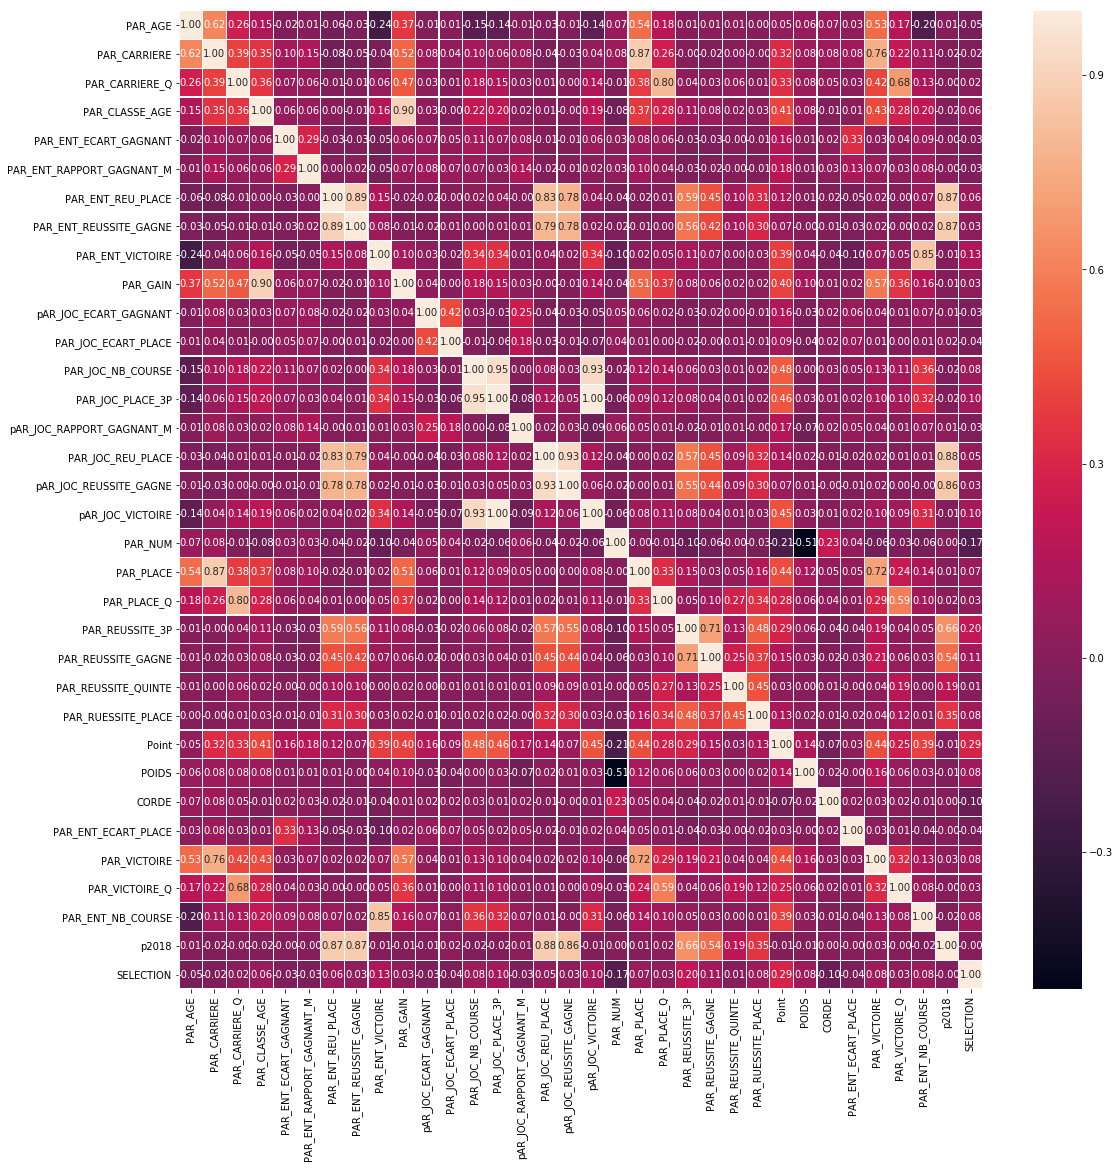

In [244]:
#Enfin, quelque chose de vraiment cool que vous pouvez mettre 

#dans une carte de chaleur est une matrice de corrélation. 
#Pandas DataFrame a une méthode corr qui calcule le coefficient de corrélation de Pearson (peut être un autre)
#entre tous les couples de colonnes numériques du DataFrame.

fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(df_gagnant.corr(), annot=True, fmt=".2f", linewidths=.2, ax=ax)


In [221]:


#print('CHEVAL_QUINTE')
#print(df_gagnant['MY_auto_start'].value_counts())


#print(df_gagnant['PAR_AGE'].sort_values())
#print(df_gagnant['MY_REUSSITE_JOC'].loc[df_gagnant['MY_REUSSITE_JOC']>=0.5,])





Proportion: 2.35 : 1
Total number of records : 239275 
Nombre de participations avec SELECTION = 0 : 167839
Nombre de participations avec SELECTION = 1  : 71436
Pourcentage 0: 70.1448%,  pourcentage 1 : 29.8552%


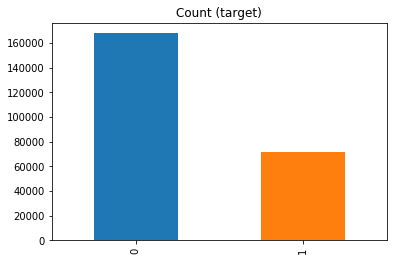

In [34]:
target_count = df_gagnant['SELECTION'].value_counts()


print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (target)')

normal_trans_perc = sum(df_gagnant['SELECTION'] == 0) / (sum(df_gagnant['SELECTION'] == 0) + sum(df_gagnant['SELECTION'] == 1))
fraud_trans_perc = 1 - normal_trans_perc
print('Total number of records : {} '.format(len(df_gagnant)))
print('Nombre de participations avec SELECTION = 0 : {}'.format(sum(df_gagnant['SELECTION'] == 0)))
print('Nombre de participations avec SELECTION = 1  : {}'.format(sum(df_gagnant['SELECTION'] == 1)))
print('Pourcentage 0: {:.4f}%,  pourcentage 1 : {:.4f}%'.format(normal_trans_perc * 100,fraud_trans_perc * 100))




# Definition des set

In [35]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(df_gagnant[feature_columns],
                                                     df_gagnant[response_column], test_size=0.25, random_state=42)
train_eval_X =  df_gagnant[feature_columns]
train_eval_Y=  df_gagnant[response_column]





print("Train_x",train_x.shape)
print("Train y",train_y.shape)
print("Test x",test_x.shape)
print("Test y",test_y.shape)

print("train_eval_X",train_eval_X.shape)
print("train_eval_Y",train_eval_Y.shape)

print("Test x",test_x.shape)
print("Test y",test_y.shape)

test_y = test_y['SELECTION'].ravel()
train_y = train_y['SELECTION'].ravel()



Train_x (179456, 31)
Train y (179456, 1)
Test x (59819, 31)
Test y (59819, 1)
train_eval_X (239275, 31)
train_eval_Y (239275, 1)
Test x (59819, 31)
Test y (59819, 1)


In [36]:
def smot2(train_x,train_y,feature_columns):
    start_time=timer()
    from imblearn.combine import SMOTEENN
    from imblearn.over_sampling import SMOTE


    #print('\nOriginal dataset shape {}'.format(Counter(train_y)))
    sm = SMOTEENN(ratio='minority',n_jobs=3,random_state=42,
                         n_neighbors=5,smote=SMOTE())
    
    sm = SMOTE(ratio='minority', n_jobs=3, random_state=42,m_neighbors=200)


    X_res, y_res = sm.fit_sample(train_x, train_y)



    train_x = pd.DataFrame(X_res, columns=feature_columns)
    train_y = pd.Series(y_res)
    print("Fin SMOT")
    timer(start_time)


    return train_x,train_y

# ESTIMATEUR

In [37]:

#sample_weight = train_y.shape[0] / (2 * np.bincount(train_y))
#print("class_weight = ", sample_weight)
#sample_weight=[0.63,2.28]

#kfold = StratifiedKFold(n_splits=5)
#print(kfold)    

silence_esti=False


train_x, train_y = smot2(train_x=train_x, train_y=train_y, feature_columns=feature_columns)
#test_x, test_y = smot2(train_x=test_x, train_y=test_y, feature_columns=feature_columns)



2018-07-02 07:32:13.093947
Fin SMOT

 Time taken: 0 hours 0 minutes and 23.56 seconds.


In [38]:

if allure_etudier == 1:
                  estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.6,
       colsample_bytree=0.7, gamma=0.0, learning_rate=0.04,
       max_delta_step=3, max_depth=11, max_features='sqrt',
       min_child_weight=6, n_estimators=1800, n_jobs=2,
       nthread=None, objective='binary:logistic', random_state=42,
       reg_alpha=1e-05, reg_lambda=5.0, scale_pos_weight=1, seed=80,
       silent=False, subsample=1)
if allure_etudier == 3:
                estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=0.9, gamma=0.3, learning_rate=0.07,
                max_delta_step=4, max_depth=10, max_features='sqrt',
                min_child_weight=13, n_estimators=1800, n_jobs=1,
                nthread=None, objective='binary:logistic', random_state=10,
                reg_alpha=0.2, reg_lambda=1, scale_pos_weight=1, seed=400,
                silent=True, subsample=0.9)

if allure_etudier == 2:
                estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.2, learning_rate=0.07,
       max_delta_step=8, max_depth=7, max_features='sqrt',
       min_child_weight=2, n_estimators=2430, n_jobs=2,
       nthread=None, objective='binary:logistic', random_state=10,
       reg_alpha=1e-05, reg_lambda=3, scale_pos_weight=6, seed=1090,
       silent=False, subsample=1)

if allure_etudier == 4:
                 estimator =  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=0.6, gamma=0.1, learning_rate=0.07,
                max_delta_step=0, max_depth=9, max_features='sqrt',
                min_child_weight=14, n_estimators=100, n_jobs=1,
                nthread=None, objective='binary:logistic', random_state=10,
                reg_alpha=0.03, reg_lambda=1, scale_pos_weight=1, seed=27,
                silent=True, subsample=0.9)

if allure_etudier == 5:
                estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                       colsample_bytree=0.6, gamma=0.1, learning_rate=0.07,
                       max_delta_step=0, max_depth=9, max_features='sqrt',
                       min_child_weight=12, n_estimators=100, n_jobs=1,
                       nthread=None, objective='binary:logistic', random_state=10,
                       reg_alpha=0.03, reg_lambda=1, scale_pos_weight=1, seed=27,
                       silent=True, subsample=0.9)

        
model=estimator


In [39]:
#model, y_pred,predictions=my_fit2(model, train_x, train_y)
  

In [40]:
start_time=timer()
eval_set = [(train_x, train_y), (test_x, test_y)]
model.fit(train_x, train_y, eval_metric=["error", "auc"], eval_set=eval_set, verbose=True, early_stopping_rounds=100)

print("***********")
timer(start_time)          


2018-07-02 07:32:36.715774
[0]	validation_0-error:0.302594	validation_0-auc:0.773046	validation_1-error:0.352915	validation_1-auc:0.663248
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-error:0.256873	validation_0-auc:0.820435	validation_1-error:0.325382	validation_1-auc:0.682809
[2]	validation_0-error:0.238243	validation_0-auc:0.843954	validation_1-error:0.311306	validation_1-auc:0.693568
[3]	validation_0-error:0.234217	validation_0-auc:0.849259	validation_1-error:0.308063	validation_1-auc:0.695842
[4]	validation_0-error:0.231735	validation_0-auc:0.851361	validation_1-error:0.308313	validation_1-auc:0.697994
[5]	validation_0-error:0.230584	validation_0-auc:0.852298	validation_1-error:0.308531	validation_1-auc:0.699591
[6]	validation_0-error:0.228873	validation_0-auc:0.854137	validation_1-error:0.306575	validation_1-auc:0.701142
[7]	validation_0-error:0.225589

[72]	validation_0-error:0.183044	validation_0-auc:0.901095	validation_1-error:0.280931	validation_1-auc:0.713992
[73]	validation_0-error:0.182286	validation_0-auc:0.9015	validation_1-error:0.28078	validation_1-auc:0.714029
[74]	validation_0-error:0.181897	validation_0-auc:0.901771	validation_1-error:0.28078	validation_1-auc:0.71413
[75]	validation_0-error:0.181178	validation_0-auc:0.90236	validation_1-error:0.280312	validation_1-auc:0.714238
[76]	validation_0-error:0.180412	validation_0-auc:0.902971	validation_1-error:0.280362	validation_1-auc:0.714337
[77]	validation_0-error:0.180126	validation_0-auc:0.903247	validation_1-error:0.280262	validation_1-auc:0.714423
[78]	validation_0-error:0.179927	validation_0-auc:0.903575	validation_1-error:0.279945	validation_1-auc:0.714476
[79]	validation_0-error:0.179665	validation_0-auc:0.903845	validation_1-error:0.279644	validation_1-auc:0.714487
[80]	validation_0-error:0.179177	validation_0-auc:0.90429	validation_1-error:0.279493	validation_1-auc

[145]	validation_0-error:0.161134	validation_0-auc:0.921859	validation_1-error:0.274227	validation_1-auc:0.717418
[146]	validation_0-error:0.160956	validation_0-auc:0.922093	validation_1-error:0.274227	validation_1-auc:0.717485
[147]	validation_0-error:0.160789	validation_0-auc:0.922246	validation_1-error:0.274144	validation_1-auc:0.717491
[148]	validation_0-error:0.160559	validation_0-auc:0.922488	validation_1-error:0.274127	validation_1-auc:0.717502
[149]	validation_0-error:0.160432	validation_0-auc:0.922647	validation_1-error:0.274077	validation_1-auc:0.717523
[150]	validation_0-error:0.160221	validation_0-auc:0.922912	validation_1-error:0.274344	validation_1-auc:0.717536
[151]	validation_0-error:0.159895	validation_0-auc:0.923111	validation_1-error:0.274227	validation_1-auc:0.717618
[152]	validation_0-error:0.159618	validation_0-auc:0.923324	validation_1-error:0.273993	validation_1-auc:0.71767
[153]	validation_0-error:0.159471	validation_0-auc:0.923526	validation_1-error:0.274244	v

[218]	validation_0-error:0.148472	validation_0-auc:0.934659	validation_1-error:0.272773	validation_1-auc:0.718742
[219]	validation_0-error:0.148397	validation_0-auc:0.934732	validation_1-error:0.272806	validation_1-auc:0.718739
[220]	validation_0-error:0.148202	validation_0-auc:0.934848	validation_1-error:0.272773	validation_1-auc:0.718728
[221]	validation_0-error:0.148087	validation_0-auc:0.935017	validation_1-error:0.272773	validation_1-auc:0.718734
[222]	validation_0-error:0.147845	validation_0-auc:0.935216	validation_1-error:0.272589	validation_1-auc:0.718804
[223]	validation_0-error:0.147722	validation_0-auc:0.935326	validation_1-error:0.272522	validation_1-auc:0.718823
[224]	validation_0-error:0.147535	validation_0-auc:0.935439	validation_1-error:0.272656	validation_1-auc:0.718836
[225]	validation_0-error:0.147483	validation_0-auc:0.935505	validation_1-error:0.272656	validation_1-auc:0.718841
[226]	validation_0-error:0.147396	validation_0-auc:0.935651	validation_1-error:0.272706	

[290]	validation_0-error:0.137759	validation_0-auc:0.944588	validation_1-error:0.272338	validation_1-auc:0.719253
[291]	validation_0-error:0.137712	validation_0-auc:0.944706	validation_1-error:0.272388	validation_1-auc:0.719271
[292]	validation_0-error:0.137573	validation_0-auc:0.944842	validation_1-error:0.272255	validation_1-auc:0.719261
[293]	validation_0-error:0.137243	validation_0-auc:0.945025	validation_1-error:0.272188	validation_1-auc:0.719242
[294]	validation_0-error:0.137192	validation_0-auc:0.945064	validation_1-error:0.272221	validation_1-auc:0.719238
[295]	validation_0-error:0.137029	validation_0-auc:0.945207	validation_1-error:0.272455	validation_1-auc:0.719235
[296]	validation_0-error:0.136858	validation_0-auc:0.945371	validation_1-error:0.272288	validation_1-auc:0.719235
[297]	validation_0-error:0.136608	validation_0-auc:0.945528	validation_1-error:0.272305	validation_1-auc:0.719214
[298]	validation_0-error:0.136469	validation_0-auc:0.945676	validation_1-error:0.272255	

[363]	validation_0-error:0.128278	validation_0-auc:0.953204	validation_1-error:0.271803	validation_1-auc:0.719121
[364]	validation_0-error:0.127877	validation_0-auc:0.953423	validation_1-error:0.272121	validation_1-auc:0.719094
[365]	validation_0-error:0.127754	validation_0-auc:0.953481	validation_1-error:0.272238	validation_1-auc:0.719075
[366]	validation_0-error:0.127631	validation_0-auc:0.95361	validation_1-error:0.272104	validation_1-auc:0.719102
[367]	validation_0-error:0.127206	validation_0-auc:0.953884	validation_1-error:0.272037	validation_1-auc:0.719071
[368]	validation_0-error:0.127087	validation_0-auc:0.953974	validation_1-error:0.272004	validation_1-auc:0.719068
[369]	validation_0-error:0.126991	validation_0-auc:0.954047	validation_1-error:0.271904	validation_1-auc:0.719053
[370]	validation_0-error:0.126892	validation_0-auc:0.9541	validation_1-error:0.271904	validation_1-auc:0.719053
[371]	validation_0-error:0.126793	validation_0-auc:0.954183	validation_1-error:0.27187	vali

Area under the ROC curve : 0.723208


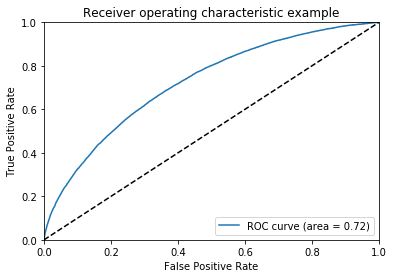

In [95]:
courbe_de_roc(estimator, test_x,test_y)

In [96]:
y_pred = model.predict(test_x)
predictions = [round(value) for value in y_pred]
PROBA = model.predict_proba(test_x)



In [97]:
print(PROBA)

[[0.69610393 0.30389604]
 [0.73927546 0.2607245 ]
 [0.70851576 0.29148424]
 ...
 [0.2974484  0.7025516 ]
 [0.7560416  0.24395843]
 [0.683173   0.316827  ]]


In [98]:
 # evaluate predictions
accuracy = accuracy_score(test_y, predictions)
print(">>>>>>>>>>  Accuracy: %.2f%%" % (accuracy * 100.0))
        

>>>>>>>>>>  Accuracy: 72.88%


In [99]:
    print(classification_report(test_y, predictions))

             precision    recall  f1-score   support

          0       0.75      0.91      0.83     41913
          1       0.59      0.30      0.40     17906

avg / total       0.71      0.73      0.70     59819



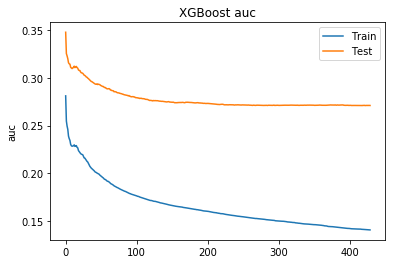

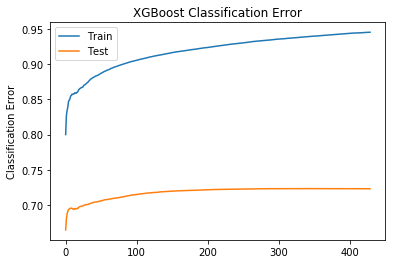


                           importance
feature                              
Point                           0.064
PAR_GAIN                        0.057
PAR_CLASSE_AGE                  0.056
PAR_REUSSITE_3P                 0.049
PAR_ENT_NB_COURSE               0.046
PAR_CARRIERE                    0.046
PAR_NUM                         0.044
PAR_RUESSITE_PLACE              0.043
PAR_REUSSITE_GAGNE              0.043
PAR_ENT_RAPPORT_GAGNANT_M       0.043
PAR_JOC_NB_COURSE               0.041
pAR_JOC_RAPPORT_GAGNANT_M       0.036
PAR_PLACE                       0.035
PAR_ENT_ECART_GAGNANT           0.034
PAR_ENT_REU_PLACE               0.033
PAR_JOC_REU_PLACE               0.033
PAR_JOC_PLACE_3P                0.031
PAR_VICTOIRE                    0.031
PAR_ENT_ECART_PLACE             0.030
PAR_JOC_ECART_PLACE             0.029
PAR_ENT_VICTOIRE                0.027
pAR_JOC_ECART_GAGNANT           0.026
PAR_ENT_REUSSITE_GAGNE          0.026
pAR_JOC_REUSSITE_GAGNE          0.025
pAR_JOC_VIC

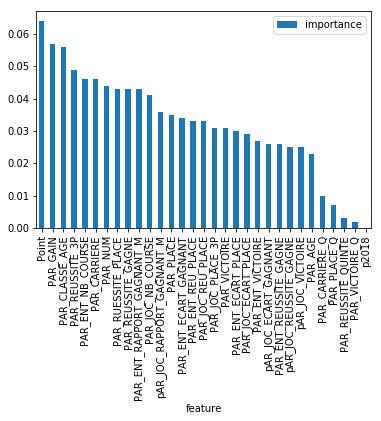

In [100]:

        # retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['auc'])
x_axis = range(0, epochs)

 # plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('auc')
pyplot.title('XGBoost auc')
pyplot.show()

        # plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis, results['validation_1']['auc'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

        #Plot_predictor_importance(best_model=model, feature_columns=featurecolums)

plot_importance(feature_columns=feature_columns,model=model)


In [101]:
#afficheEvalSet(model,train_x,train_y,test_x,test_y,type_eval=1)
#afficheEvalSet(model,train_x,train_y,test_x,test_y,type_eval=2)

In [102]:
#kfold = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
#results = cross_val_score(model, train_x, train_y, cv=kfold)
#print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
y_pred = model.predict(test_x)
metrique_classe(y_pred=y_pred,y_true=test_y,xclass=0)
metrique_classe(y_pred=y_pred, y_true=test_y, xclass=1)



Sensibilité  du re-equilibrage des données sur le TEST
La spécificité est intuitivement la capacité du classificateur à trouver tous les échantillons positifs
Binary 
0.2969395733273763

Calculer la moyenne géométrique
0.5207696079711758

 Calculer  sensitivity score
La sensibilité est le rapport où est le nombre de vrais positifs et le nombre de faux négatifs.
La sensibilité quantifie la capacité à éviter les faux négatifs.
0.913320449502541
Sensibilité  du re-equilibrage des données sur le TEST
La spécificité est intuitivement la capacité du classificateur à trouver tous les échantillons positifs
Binary 
0.913320449502541

Calculer la moyenne géométrique
0.5207696079711758

 Calculer  sensitivity score
La sensibilité est le rapport où est le nombre de vrais positifs et le nombre de faux négatifs.
La sensibilité quantifie la capacité à éviter les faux négatifs.
0.2969395733273763


In [103]:

#evaluation_2(model, train_x, train_y, test_x, test_y)
    


In [104]:
df_numero_a_predire = lecture_data('d:\data_jour.csv', xnames, ['IDPARTCIPANT', 'IDCOURSE'],allure=allure_etudier,avec_index=False)
print("Fichier lu d:\data_jour.csv" )



start_time=timer()

#df_numero_a_predire=transformation_courses(df_numero_a_predire,allure_etudier)

#df_numero_a_predire, critere_scale =encodage(df_numero_a_predire)

df_numero_a_predire=calcul_les_notes(df_numero_a_predire)

#df_numero_a_predire =suppression_colonne(df_numero_a_predire, allure=0)
#df_numero_a_predire =suppression_colonne(df_numero_a_predire, allure=allure_etudier)

df_numero_a_predire['SELECTION'] = 0

#print(df_numero_a_predire.info())
print('\n')
print(feature_columns)
print(" \n ------SUPPRESSIOOn OK------------")






Fichier lu d:\data_jour.csv
2018-06-30 17:42:11.207195
2018-06-30 17:42:11.207195

 Time taken: 0 hours 0 minutes and 0.05 seconds.
    print(N°  0 None

 Time taken: 0 hours 0 minutes and 0.17 seconds.
    print(N°  1 None

 Time taken: 0 hours 0 minutes and 0.3 seconds.
    print(N°  2 None

 Time taken: 0 hours 0 minutes and 0.43 seconds.
    print(N°  3 None

 Time taken: 0 hours 0 minutes and 0.55 seconds.
    print(N°  4 None


Index(['PAR_AGE', 'PAR_CARRIERE', 'PAR_CARRIERE_Q', 'PAR_CLASSE_AGE',
       'PAR_ENT_ECART_GAGNANT', 'PAR_ENT_RAPPORT_GAGNANT_M',
       'PAR_ENT_REU_PLACE', 'PAR_ENT_REUSSITE_GAGNE', 'PAR_ENT_VICTOIRE',
       'PAR_GAIN', 'pAR_JOC_ECART_GAGNANT', 'PAR_JOC_ECART_PLACE',
       'PAR_JOC_NB_COURSE', 'PAR_JOC_PLACE_3P', 'pAR_JOC_RAPPORT_GAGNANT_M',
       'PAR_JOC_REU_PLACE', 'pAR_JOC_REUSSITE_GAGNE', 'pAR_JOC_VICTOIRE',
       'PAR_NUM', 'PAR_PLACE', 'PAR_PLACE_Q', 'PAR_REUSSITE_3P',
       'PAR_REUSSITE_GAGNE', 'PAR_REUSSITE_QUINTE', 'PAR_RUESSITE_PLACE',


In [105]:


df_numero_a_predire=df_numero_a_predire.set_index( ['IDPARTCIPANT', 'IDCOURSE'])


In [106]:
df_numero_a_predire.head(10)

,,ALLURE,CO_DISTANCE,CO_PRIX,HIPPO,PAR_AGE,PAR_ARRIVE,PAR_CARRIERE,PAR_CARRIERE_Q,PAR_CLASSE_AGE,PAR_COTEDER,...,MUSIC_ENT,MUSIC_JOC,PAR_VALEUR,PAR_ENT_ECART_PLACE,PAR_VICTOIRE,PAR_VICTOIRE_Q,PAR_ENT_NB_COURSE,FIN_ligne,p2018,SELECTION
IDPARTCIPANT,IDCOURSE,,,,,,,,,,,,,,,,,,,,,
1220365,98431,1,2,55000,80,6,0,13.015873,0.000000,15.080685,5,...,1ADADA2A,0ADA1A0A,0,0,12.000000,0,1.593830,FINFIN,0,0
1220366,98431,1,2,55000,80,6,0,11.428571,0.000000,10.043730,12,...,0ADA1A2A,1A2A7A2A,0,2,9.333333,0,10.668380,FINFIN,0,0
1220367,98432,1,1,48000,80,9,0,15.000000,0.000000,15.413749,11,...,DA2M2A5A,DM2A1A7A,0,1,7.777778,0,14.485597,FINFIN,0,0
1220368,98432,1,1,48000,80,8,0,8.906250,10.666667,17.413113,7,...,0A7M7A4M,0M3A3A2A,0,9,10.000000,0,3.292181,FINFIN,0,0
1220369,98432,1,1,48000,80,9,0,20.000000,2.666667,15.289624,298,...,0ADA1ADA,DA0ADADA,0,2,13.333333,0,4.732510,FINFIN,0,0
1220370,98432,1,1,48000,80,9,0,8.125000,4.000000,15.017823,17,...,2A5A7A3A,2A5A7A3A,0,0,15.555556,0,14.403292,FINFIN,0,0
1220371,98432,1,1,48000,80,8,0,8.593750,6.666667,16.974539,70,...,5MDADA2A,0MDA6A0M,0,3,7.777778,0,2.839506,FINFIN,0,0
1220372,98432,1,1,48000,80,7,0,7.343750,8.000000,20.000000,6,...,7M2A2ADM,DMDA7A4A,0,1,6.666667,0,14.115226,FINFIN,0,0
1220373,98432,1,1,48000,80,8,0,9.687500,13.333333,16.876512,5,...,0ADA1A2A,5A4A1A2A,0,2,15.555556,1,17.078189,FINFIN,0,0


In [107]:

train_x, test_x, train_y, test_y = split_dataset(df_numero_a_predire, 0, feature_columns, response_column)

test_y = test_y['SELECTION'].ravel()


y_pred = model.predict(test_x)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [108]:
df_pred = pd.DataFrame.from_dict(y_pred)

test_copy = test_x.copy() #################

PROBA = model.predict_proba(test_x)


In [109]:
df_proba = pd.DataFrame.from_dict(PROBA)    
df_final = pd.concat([df_proba, df_pred], axis=1)
df_final.head(10)
#print(test_copy.head(5))

,0,1,0
0,0.795901,0.204099,0
1,0.633186,0.366814,0
2,0.869348,0.130652,0
3,0.786617,0.213383,0
4,0.763483,0.236517,0
5,0.785381,0.214619,0
6,0.573958,0.426042,0
7,0.848428,0.151572,0
8,0.251419,0.748581,1
9,0.609050,0.390950,0


In [110]:



    #rint(df_final.head(5))



test_x = test_copy.copy()

test_x =my_drop(test_x, 'PAR_CLASSE_AGE')

test_x =my_drop(test_x, 'PAR_ENT_ECART_GAGNANT')
test_x =my_drop(test_x, 'PAR_ENT_RAPPORT_GAGNANT_M')
test_x =my_drop(test_x, 'PAR_ENT_REU_PLACE')
test_x =my_drop(test_x, 'PAR_ENT_REUSSITE_GAGNE')
test_x =my_drop(test_x, 'PAR_ENT_VICTOIRE')
test_x =my_drop(test_x, 'PAR_GAIN')
test_x =my_drop(test_x, 'pAR_JOC_ECART_GAGNANT')
test_x =my_drop(test_x, 'PAR_JOC_ECART_PLACE')
test_x =my_drop(test_x, 'PAR_JOC_NB_COURSE')
test_x =my_drop(test_x, 'PAR_JOC_PLACE_3P')
test_x =my_drop(test_x, 'PAR_REUSSITE_GAGNE')
test_x =my_drop(test_x, 'PAR_REUSSITE_QUINTE')
test_x =my_drop(test_x, 'PAR_RUESSITE_PLACE')
test_x =my_drop(test_x, 'CO_PRIX')
test_x =my_drop(test_x, 'PAR_CARRIERE')
test_x =my_drop(test_x, 'PAR_CARRIERE_Q')
test_x =my_drop(test_x, 'pAR_JOC_RAPPORT_GAGNANT_M')
test_x =my_drop(test_x, 'pAR_JOC_REUSSITE_GAGNE')
test_x =my_drop(test_x, 'pAR_JOC_VICTOIRE')
test_x =my_drop(test_x, 'PAR_PLACE')
test_x =my_drop(test_x, 'PAR_PLACE_Q')
test_x =my_drop(test_x, 'PAR_CLASSE_AGE')
test_x =my_drop(test_x, 'pAR_JOC_VICTOIRE')
test_x =my_drop(test_x, 'PAR_REUSSITE_3P')
test_x =my_drop(test_x, 'PAR_JOC_REU_PLACE')
test_x =my_drop(test_x, 'PAR_NUM')
test_x =my_drop(test_x, 'PAR_COTEDER')
test_x =my_drop(test_x, 'CORDE')
test_x =my_drop(test_x, 'musique')
test_x =my_drop(test_x, 'CHEVAL')
test_x =my_drop(test_x, 'Nb_partant')

test_x =my_drop(test_x, 'autostart')
test_x =my_drop(test_x, 'grande_piste')
test_x =my_drop(test_x, 'cendre')

test_x =my_drop(test_x, 'PAR_PROPRIO')
test_x =my_drop(test_x, 'NOM_JOC')
test_x =my_drop(test_x, 'NOM_ENTR')

test_x =my_drop(test_x, 'HIPPO')
test_x =my_drop(test_x, 'PAR_AGE')
test_x =my_drop(test_x, 'POIDS')
test_x =my_drop(test_x, 'CO_DISTANCE')
test_x =my_drop(test_x, 'CO_PRIX')
test_x =my_drop(test_x, 'PAR_GAIN_NORMA')
test_x =my_drop(test_x, 'CHEVAL2')
test_x =my_drop(test_x, 'PAR_REUSSITE_3P2')
test_x =my_drop(test_x, 'PAR_REUSSITE_QUINTE2')
test_x =my_drop(test_x, 'PAR_CLASSE_AGE2')
test_x =my_drop(test_x, 'PAR_COTEDER2')
test_x =my_drop(test_x, 'Point')

test_x =my_drop(test_x, 'MUSIC_CHEVAL')
test_x =my_drop(test_x, 'MUSIC_ENT')
test_x =my_drop(test_x, 'MUSIC_JOC')
test_x =my_drop(test_x, 'PAR_VALEUR')

test_x =my_drop(test_x, 'MY_REUSSITE_CHEVAL')
test_x =my_drop(test_x, 'MY_REUSSITE_JOC')

test_x =my_drop(test_x, 'MY_REUSSITE_ENT')
test_x =my_drop(test_x, 'MY_ECART_JOC')
test_x =my_drop(test_x, 'CLA_AGE_PRIX')
test_x =my_drop(test_x, 'MY_auto_start')


test_x =my_drop(test_x, 'PAR_ENT_ECART_PLACE')
test_x =my_drop(test_x, 'PAR_VICTOIRE')
test_x =my_drop(test_x, 'PAR_VICTOIRE_Q')
test_x =my_drop(test_x, 'CHEVAL_QUINTE')
test_x =my_drop(test_x, 'PAR_ENT_NB_COURSE')


test_x['v0'] = 0.0
test_x['v1'] = 0.0
test_x['sel'] = 0




test_x.head(10)

,,p2018,v0,v1,sel
IDPARTCIPANT,IDCOURSE,,,,
1220393,98433,0,0.0,0.0,0
1220724,98462,0,0.0,0.0,0
1221045,98491,0,0.0,0.0,0
1220738,98463,0,0.0,0.0,0
1221099,98495,0,0.0,0.0,0
1221083,98494,0,0.0,0.0,0
1220695,98460,0,0.0,0.0,0
1221052,98492,0,0.0,0.0,0
1220350,98430,0,0.0,0.0,0


In [111]:
df_proba.head(20)

,0,1
0,0.795901,0.204099
1,0.633186,0.366814
2,0.869348,0.130652
3,0.786617,0.213383
4,0.763483,0.236517
5,0.785381,0.214619
6,0.573958,0.426042
7,0.848428,0.151572
8,0.251419,0.748581
9,0.609050,0.390950


In [112]:
# test_x
cumul = 1
nb_rows = len(df_proba.index)
print("nb_rows=", nb_rows)
print(" FORMATION DU FICHIER ...",allure_etudier)
for i in range(0, nb_rows):
        n = df_proba[0][i]
        test_x['v0'][i] = n
        
        n = df_proba[1][i]
        test_x['v1'][i] = n
        


timer(start_time)

nb_rows= 278
 FORMATION DU FICHIER ... 1

 Time taken: 0 hours 0 minutes and 24.07 seconds.


In [113]:
test_x.head(20)

,,p2018,v0,v1,sel
IDPARTCIPANT,IDCOURSE,,,,
1220393,98433,0,0.795901,0.204099,0
1220724,98462,0,0.633186,0.366814,0
1221045,98491,0,0.869348,0.130652,0
1220738,98463,0,0.786617,0.213383,0
1221099,98495,0,0.763483,0.236517,0
1221083,98494,0,0.785381,0.214619,0
1220695,98460,0,0.573958,0.426042,0
1221052,98492,0,0.848428,0.151572,0
1220350,98430,0,0.251419,0.748581,0


In [114]:
print("\n\n fin de copie sur Test_x", test_x.head(10))

if (allure_etudier == 1):
    test_x.to_csv("d:\py_resultat_trot.csv")

if (allure_etudier == 2):
    test_x.to_csv("d:\py_resultat_galop.csv")

if (allure_etudier == 3):
    test_x.to_csv("d:\py_resultat_trot_monte.csv")

if (allure_etudier == 4):
    test_x.to_csv("d:\py_resultat_haie.csv")

if (allure_etudier == 5):
    test_x.to_csv("d:\py_resultat_steeple.csv")

    

    
print("\n\n ALLER DANS APPLICATION DIABOLO ...Allure %s *********************" % allure_etudier)



 fin de copie sur Test_x                        p2018        v0        v1  sel
IDPARTCIPANT IDCOURSE                                
1220393      98433         0  0.795901  0.204099    0
1220724      98462         0  0.633186  0.366814    0
1221045      98491         0  0.869348  0.130652    0
1220738      98463         0  0.786617  0.213383    0
1221099      98495         0  0.763483  0.236517    0
1221083      98494         0  0.785381  0.214619    0
1220695      98460         0  0.573958  0.426042    0
1221052      98492         0  0.848428  0.151572    0
1220350      98430         0  0.251419  0.748581    0
1220739      98463         0  0.609050  0.390950    0


 ALLER DANS APPLICATION DIABOLO ...Allure 1 *********************


In [115]:
test_x

,,p2018,v0,v1,sel
IDPARTCIPANT,IDCOURSE,,,,
1220393,98433,0,0.795901,0.204099,0
1220724,98462,0,0.633186,0.366814,0
1221045,98491,0,0.869348,0.130652,0
1220738,98463,0,0.786617,0.213383,0
1221099,98495,0,0.763483,0.236517,0
1221083,98494,0,0.785381,0.214619,0
1220695,98460,0,0.573958,0.426042,0
1221052,98492,0,0.848428,0.151572,0
1220350,98430,0,0.251419,0.748581,0
